# Statsmodels

## Intro

### Libs 0

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
# from matplotlib.dates import DateFormatter
# from matplotlib import dates
# import matplotlib.dates as mdates

In [2]:
# import numpy as np
import pylab
import seaborn as sns
# import statsmodels.api as sm

sns.set_style("whitegrid")
pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)

In [3]:
# %conda install -c conda-forge seaborn==0.11.0

### Libs 1.1

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

### Libs 1.2

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Body

In [6]:
file_path = "/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/macrodata.csv"

In [7]:
df = pd.read_csv(file_path, index_col=0, parse_dates=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 23.8 KB


In [9]:
def describe2(df):
    df_des = df.describe()
    df_des.loc['range'] = df_des.loc['max'] - df_des.loc['min']
    return df_des


describe2(df).T

,count,mean,std,min,25%,50%,75%,max,range
year,203.0,1983.876847,14.686817,1959.000,1971.0000,1984.000,1996.5000,2009.000,50.000
quarter,203.0,2.492611,1.118563,1.000,1.5000,2.000,3.0000,4.000,3.000
realgdp,203.0,7221.171901,3214.956044,2710.349,4440.1035,6559.594,9629.3465,13415.266,10704.917
realcons,203.0,4825.293103,2313.346192,1707.400,2874.1000,4299.900,6398.1500,9363.600,7656.200
realinv,203.0,1012.863862,585.102267,259.764,519.1475,896.210,1436.6815,2264.721,2004.957
realgovt,203.0,663.328640,140.863655,460.400,527.9595,662.412,773.0490,1044.088,583.688
realdpi,203.0,5310.540887,2423.515977,1886.900,3276.9500,4959.400,6977.8500,10077.500,8190.600
cpi,203.0,105.075788,61.278878,28.980,41.0500,104.100,159.6500,218.610,189.630
m1,203.0,667.927586,455.346381,139.600,228.6500,540.900,1102.1000,1673.900,1534.300
tbilrate,203.0,5.311773,2.803071,0.120,3.5150,5.010,6.6650,15.330,15.210


In [10]:
# No missing values
df.isnull().sum()

year        0
quarter     0
realgdp     0
realcons    0
realinv     0
realgovt    0
realdpi     0
cpi         0
m1          0
tbilrate    0
unemp       0
pop         0
infl        0
realint     0
dtype: int64

<AxesSubplot:>

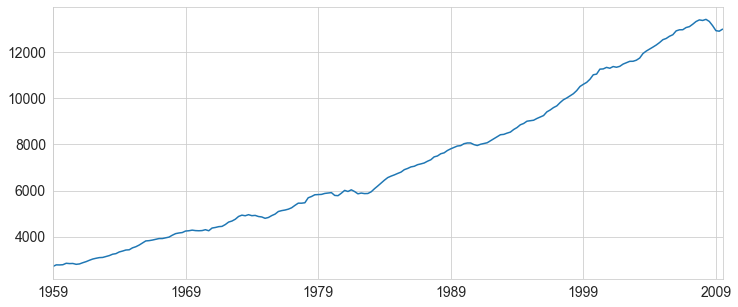

In [11]:
df['realgdp'].plot(figsize=(12, 5), grid=True)

In [12]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'])

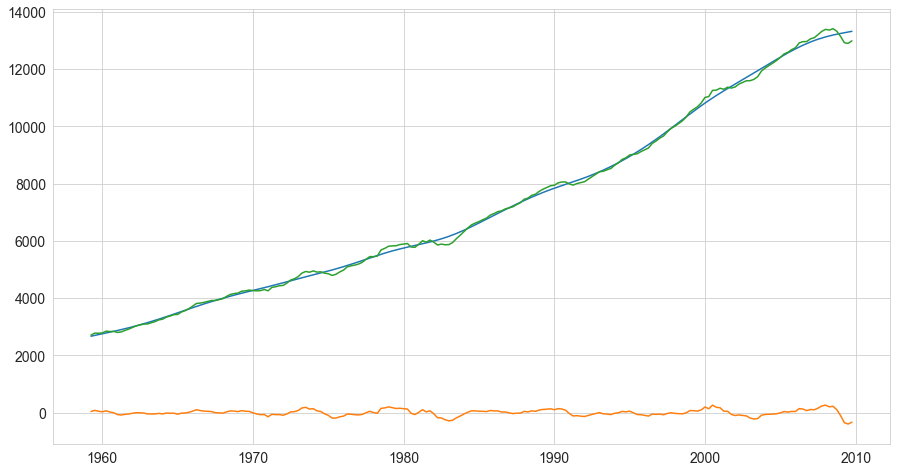

In [13]:
# Add columns to dataframe to see the legend
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(gdp_trend)
ax.plot(gdp_cycle)
ax.plot(df.realgdp)

In [14]:
df['trend'] = gdp_trend

<AxesSubplot:>

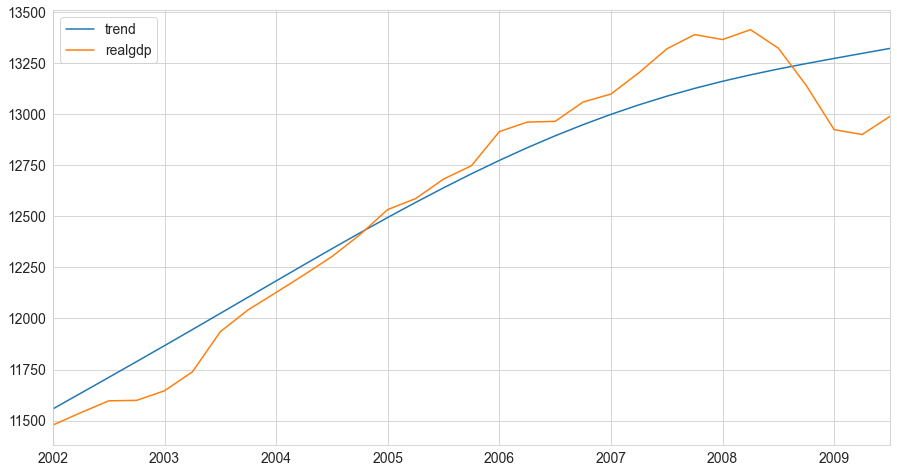

In [15]:
df_gpd = df.loc[:,'trend realgdp'.split()]
df_gpd.loc['2002':].plot(figsize=(15,8))

## ETS Models and Decomposition with ETS

In [16]:
file_path = "/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/airline_passengers.csv"

In [17]:
df = pd.read_csv(file_path,index_col='Month',parse_dates=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Thousands of Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [20]:
df.isnull().sum()

Thousands of Passengers    0
dtype: int64

In [21]:
df.sort_values(df.columns[0])

,Thousands of Passengers
Month,
1949-11-01,104
1949-01-01,112
1950-11-01,114
1950-01-01,115
1949-02-01,118
...,...
1960-06-01,535
1959-07-01,548
1959-08-01,559


In [22]:
df['passengers'] = df['Thousands of Passengers']

In [23]:
df.drop('Thousands of Passengers',axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [25]:
df

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

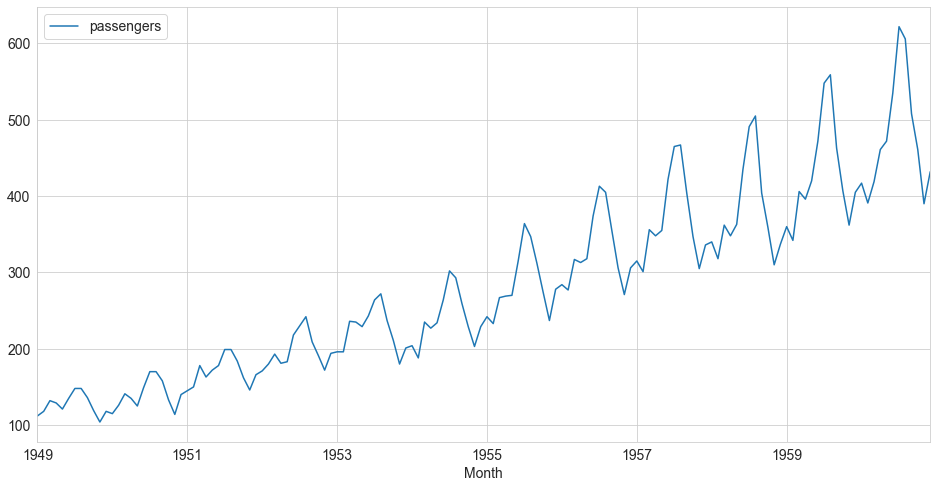

In [26]:
df.plot()

In [27]:
res = seasonal_decompose(df.passengers,model='multiplicative')

In [28]:
# np.array(res.trend)

In [29]:
# res.seasonal

In [30]:
# res.resid

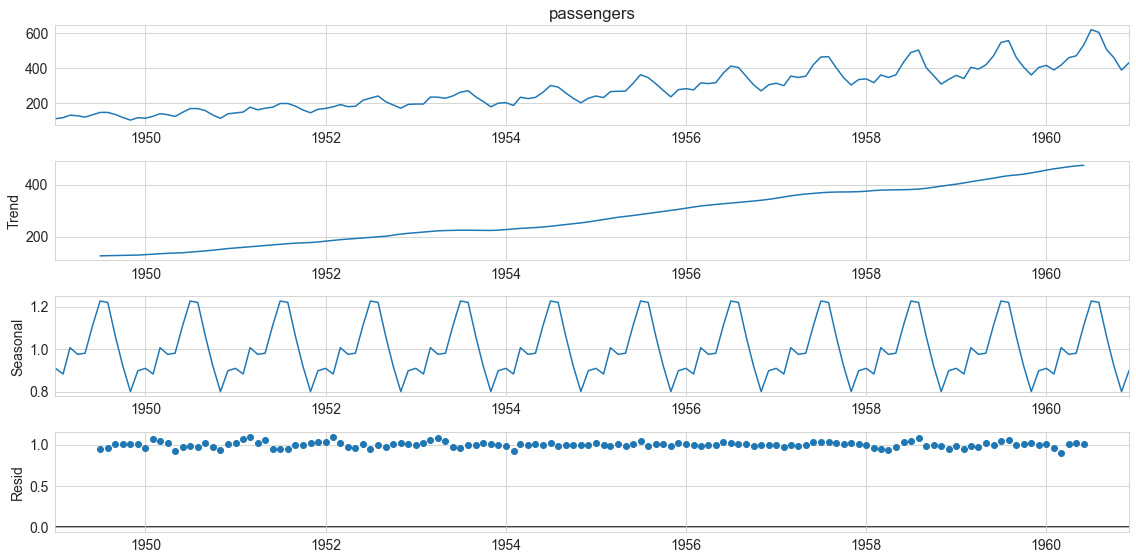

In [31]:
# from pylab import rcParams
# rcParams['figure.figsize'] = (14,8)

res.plot(); 

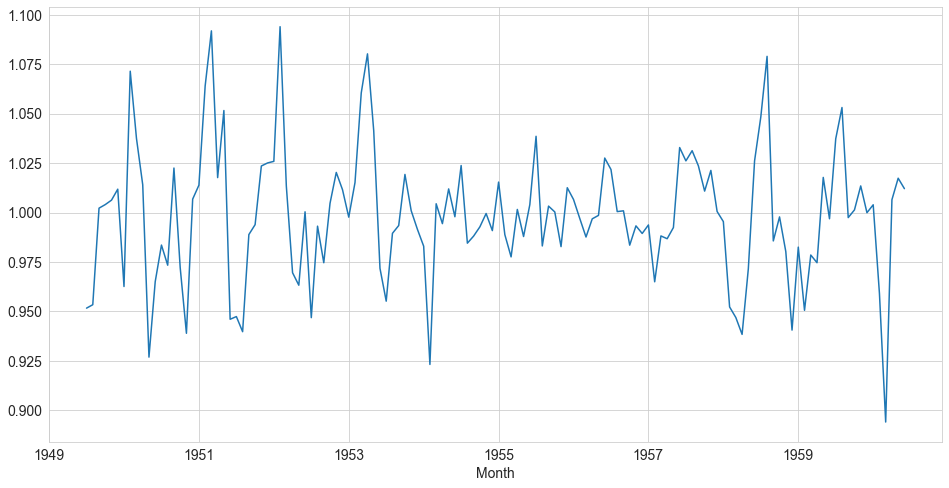

In [40]:
ax = res.resid.plot()

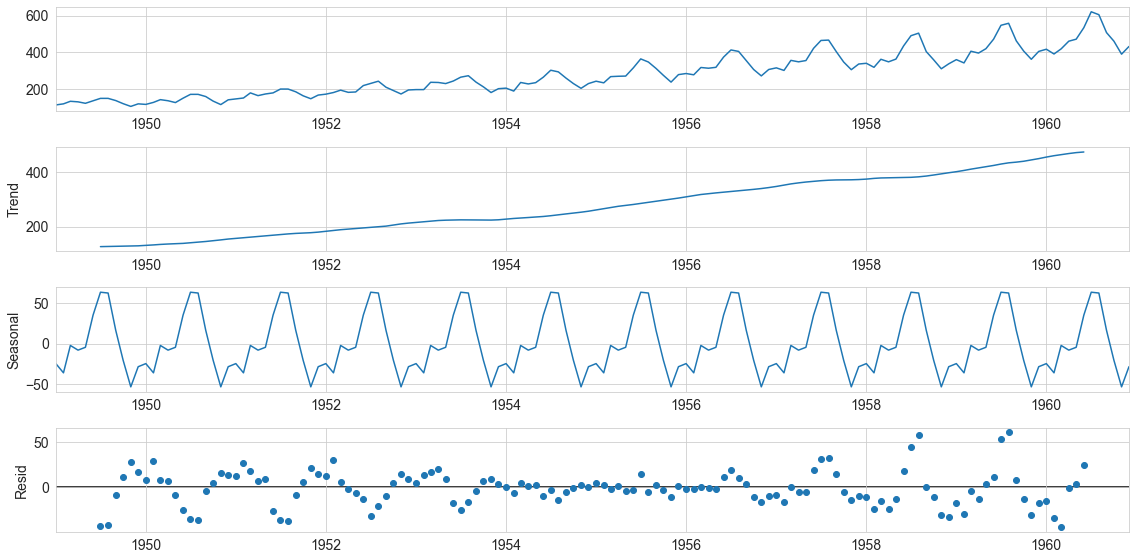

In [33]:
# from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(df,model = 'add')
result_add.plot();

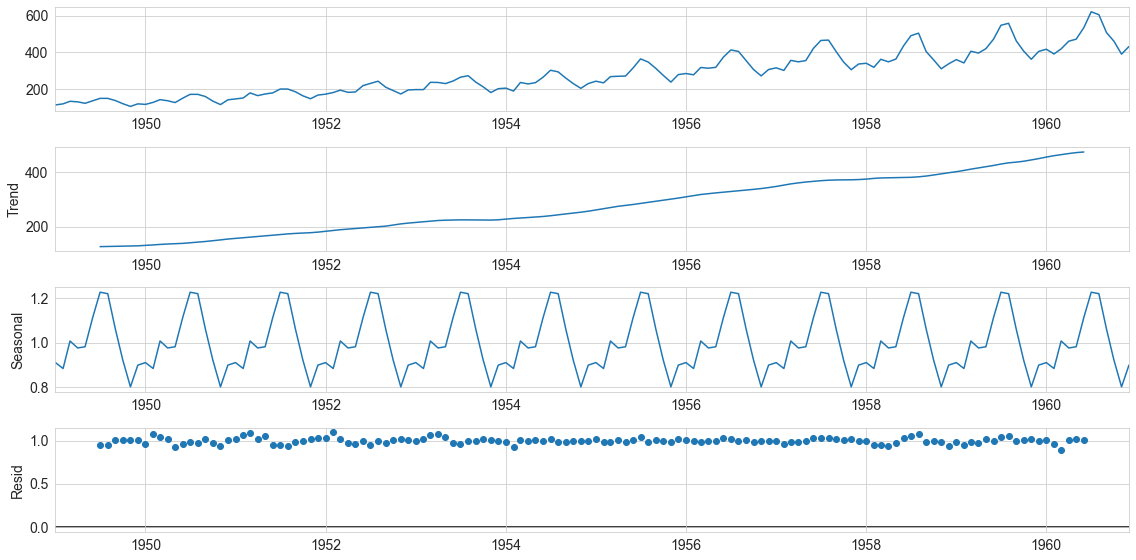

In [34]:
result_mul = seasonal_decompose(df,model='mul')
result_mul.plot();

In [35]:
df

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## EWMA Model

In [61]:
# import pandas as pd 
# import numpy as np 
# import matplotlib.pyplot as plt

In [70]:
df["SMA(6)"] = df["passengers"].rolling(6).mean()
df["SMA(12)"] = df["passengers"].rolling(12).mean()

In [71]:
df.isna().sum()# SMA

passengers     0
EMA(12)        0
SMA(6)         5
SMA(12)       11
dtype: int64

<AxesSubplot:xlabel='Month'>

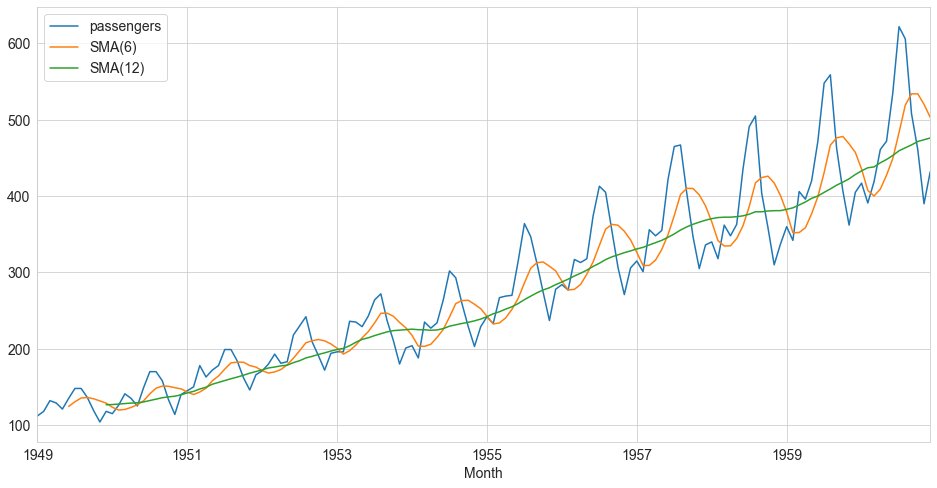

In [77]:
df["passengers SMA(6) SMA(12)".split()].plot()

In [78]:
df['EMA(12)'] = df['passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

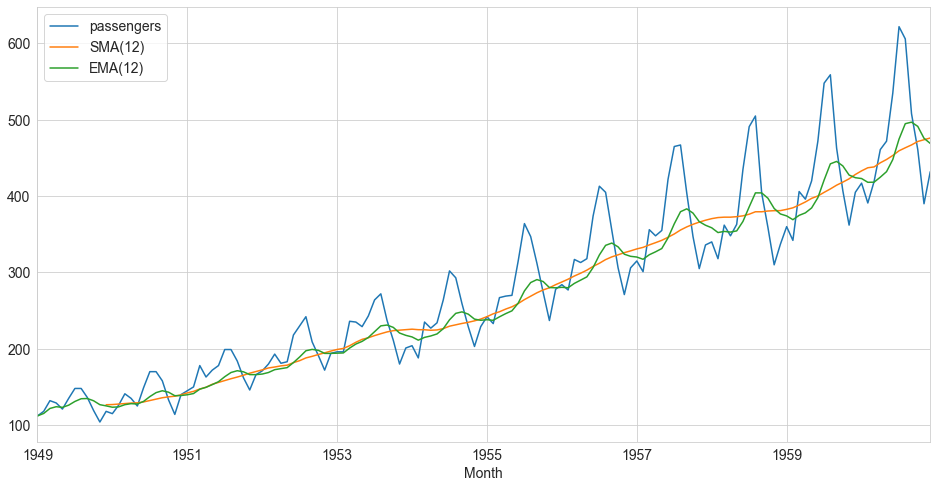

In [79]:
df['passengers SMA(12) EMA(12)'.split()].plot()